In [224]:
# Importing libraries
import matplotlib.pyplot as plt
import os
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.resnet50 import ResNet50
import os
import zipfile
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
from tensorflow.keras import Model

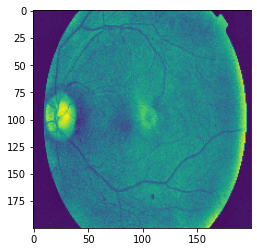

In [207]:
# a loop to read 1 image of a category to check if the code would work 
DATADIR ="C:/study_material/capp/retina/1 vs 2,3,4"
CATEGORIES = ['1','2,3,4']
IMG_SIZE = 200
for category in CATEGORIES:
    path = os.path.join(DATADIR,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
        image_bw = cv2.cvtColor(new_array, cv2.COLOR_BGR2GRAY)
        clahe = cv2.createCLAHE(clipLimit = 5)
        final_img = clahe.apply(image_bw)
        plt.imshow(final_img)
        plt.show()
        break
    break

In [208]:
# creating the training dataset using the images of all 5 categories
DATADIR ="C:/study_material/capp/retina/1 vs 2,3,4"
CATEGORIES = ['1','2,3,4']
training_data = []
IMG_SIZE = 200
def create_training_data():  # function to create an array of images
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img))
            try:
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE)) # resizing the image
                image_bw = cv2.cvtColor(new_array, cv2.COLOR_BGR2GRAY)
                clahe = cv2.createCLAHE(clipLimit = 5)
                img = clahe.apply(image_bw)
                final_img=cv2.cvtColor(img,cv2.COLOR_GRAY2RGB)
            except:
                continue
            training_data.append([final_img,class_num])
            
create_training_data()
len(training_data)

2386

In [209]:
X = []
y = []
for features,label in training_data:
    X.append(features)
    y.append(label)
X = np.array(X)
len(X),len(y)

(2386, 2386)

In [214]:
# converting the train and test data into arrays
X_train = np.array(X/255)
y_train = y

In [225]:
pre_trained_model = ResNet50(input_shape = (200, 200, 3), # Shape of our images
                                include_top = False, # Leave out the last fully connected layer
                                weights = 'imagenet')

In [244]:
last_layer = pre_trained_model.get_layer('conv4_block4_out')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.2
x = layers.Dropout(0.2)(x)                  
# Add a final sigmoid layer for classification
x = layers.Dense  (1, activation='sigmoid')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = Adam(learning_rate=0.000001), 
              loss = 'binary_crossentropy', 
              metrics = ['acc'])

last layer output shape:  (None, 13, 13, 1024)


In [245]:
model.fit(np.array(X_train), np.array(y_train), epochs=5)
#history = model.fit(
#            X_train,y_train)

Epoch 1/5
75/75 [==============================] - 305s 4s/step - loss: 0.5815 - acc: 0.6957
Epoch 2/5
75/75 [==============================] - 307s 4s/step - loss: 0.3385 - acc: 0.8554
Epoch 3/5
75/75 [==============================] - 276s 4s/step - loss: 0.2298 - acc: 0.9342
Epoch 4/5
75/75 [==============================] - 278s 4s/step - loss: 0.1628 - acc: 0.9723
Epoch 5/5
75/75 [==============================] - 278s 4s/step - loss: 0.1293 - acc: 0.9782


In [229]:
#Laoding Val_Test data
DATADIR ="C:/study_material/capp/retina/Val_Test(1 vs 234)"
CATEGORIES = ['1','2,3,4']

# creating the val_test dataset 
validation_data = []
IMG_SIZE = 200
def create_validation_data():  # function to create an array of images
    for category in CATEGORIES:
        path = os.path.join(DATADIR,category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img))
            try:
                new_array = cv2.resize(img_array,(IMG_SIZE,IMG_SIZE)) # resizing the image
                image_bw = cv2.cvtColor(new_array, cv2.COLOR_BGR2GRAY)
                clahe = cv2.createCLAHE(clipLimit = 5)
                final_img = clahe.apply(image_bw)
                final_img = cv2.cvtColor(final_img, cv2.COLOR_GRAY2BGR)
            except:
                continue
            validation_data.append([final_img,class_num])

create_validation_data()

In [230]:
# empty lists to append images and labels
X = []
y = []
# appending images to list X and labels to list Y
for features,label in validation_data:
    X.append(features)
    y.append(label)
X = np.array(X)

# normalising the data
X_test = X/255
y_test = y

# converting the train and test data into arrays
X_test = np.array(X_test)

In [231]:
y_pred = model.predict(X_test)
y_pred[:20]

array([[0.30915135],
       [0.73050654],
       [0.52244526],
       [0.80311716],
       [0.87630725],
       [0.9532812 ],
       [0.5284168 ],
       [0.94677305],
       [0.5492077 ],
       [0.59599066],
       [0.9089409 ],
       [0.6967422 ],
       [0.999817  ],
       [0.6027666 ],
       [0.6156548 ],
       [0.8857155 ],
       [0.45968172],
       [0.8867185 ],
       [0.8622131 ],
       [0.41156793]], dtype=float32)

In [240]:
y_pred_class=[]
for i in y_pred:
    if i>0.5:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0) 

In [241]:
from sklearn.metrics import confusion_matrix , classification_report
print("Classification Report: \n", classification_report(y_test, y_pred_class))

Classification Report: 
               precision    recall  f1-score   support

           0       0.15      0.15      0.15        27
           1       0.84      0.84      0.84       148

    accuracy                           0.74       175
   macro avg       0.50      0.50      0.50       175
weighted avg       0.74      0.74      0.74       175



In [242]:
confusion_matrix(y_test, y_pred_class)

array([[  4,  23],
       [ 23, 125]], dtype=int64)

In [223]:
model.save('shim_2.h5')